# Maintenance EDA

In [1]:
##gerekli kütüphanelerin import edilmesi
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#veri setinin yüklenmesi
df = pd.read_csv("predictive_maintenance.csv")

In [3]:
#veri setinin ilk 5 satırının yazdırılması
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
#veri setinin son 5 satırının yazdırılması
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()
#veri setinde boş alan yoktur

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
#kullanılmayacak UDI ve Product ID Satırlarının silinmesi
df.drop(['UDI','Product ID'], axis=1, inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
#Kelvin olarak verilen sıcaklığın celcius'a çevrimi
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

In [9]:
# Sütun adlarındaki Kelvinlerin (K) Centigrate(C) olarak değiştirilmesi
df.rename(columns={"Air temperature [K]" : "Air temperature [C]","Process temperature [K]" : "Process temperature [C]"},inplace=True)

In [10]:
df.head()

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,25.95,36.45,1551,42.8,0,0,No Failure
1,L,26.05,36.55,1408,46.3,3,0,No Failure
2,L,25.95,36.35,1498,49.4,5,0,No Failure
3,L,26.05,36.45,1433,39.5,7,0,No Failure
4,L,26.05,36.55,1408,40.0,9,0,No Failure


In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [C]      10000 non-null  float64
 2   Process temperature [C]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [12]:
df.describe()

,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000


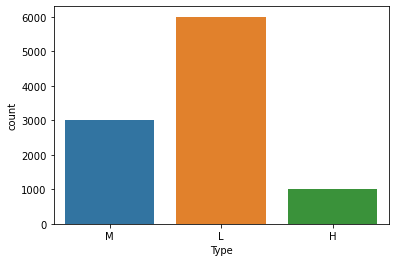

In [13]:
#ürün türüne göre dağılım
ax = sns.countplot(x="Type", data=df)

In [14]:
#sıcaklık farkı isimli yeni bir sütun oluşturulması ve ilk 5 satırın yazdırılması
# temp_diff = Process temperature - Process temperature
df['temp_diff'] = pd.DataFrame(df['Process temperature [C]']-df['Air temperature [C]'])
df.head()

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,temp_diff
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5


In [15]:
##indeksin resetlenerek sütun haline getirilmesi
#df.reset_index()

In [16]:
df.sample(5)

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,temp_diff
5868,L,29.35,38.95,1731,27.9,101,0,No Failure,9.6
4073,M,29.75,38.45,1412,46.5,89,0,No Failure,8.7
2251,H,26.95,36.15,1424,43.4,16,0,No Failure,9.2
5164,M,32.15,41.25,1624,32.1,53,0,No Failure,9.1
6466,L,28.25,37.55,1740,31.1,113,0,No Failure,9.3


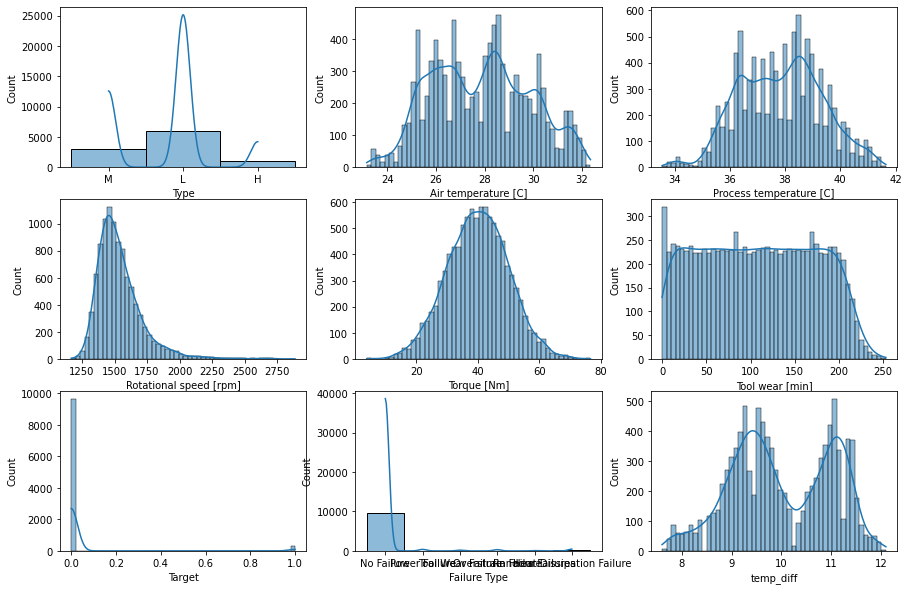

In [17]:
#veri setindeki tüm değişkenlerin histogram dağılımının yapılması
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True, bins=50)

In [18]:
import math
import numpy as np
from scipy.stats import shapiro 

import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm
df_num=df.select_dtypes(["float64","int64"])
for col in df_num:
    print(col)
    plt.figure()
#     ks,p =kstest(df_num[col],'norm')
#     print(ks,p)
    
    shapiro(df_num)
  
    
    

Air temperature [C]
Process temperature [C]
Rotational speed [rpm]
Torque [Nm]
Tool wear [min]
Target
temp_diff


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
#Hangi tür arıza tipleri olduğunu görmek için
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

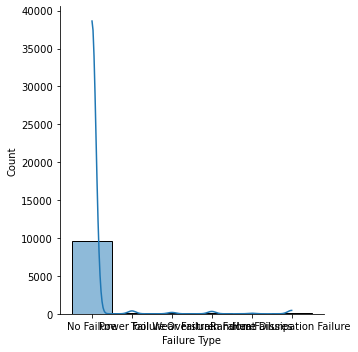

In [20]:
#seçilen tek değişkenin dağılımının basılması
sns.displot(data=df, x="Failure Type", kde=True)

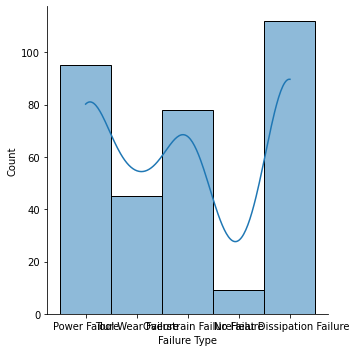

In [21]:
#seçilen tek değişkenin dağılımının basılması
#(sadece arıza olduğu durumda yani Target=1'ken)
sns.displot(data=df[df['Target'] == 1], x="Failure Type", kde=True)

In [22]:
#4 tip arıza beklerken 5 tip basılmış, 
#dolayısıyla Arıza türlerinin incelenmesi gerekmektedir
df1=df[df['Target'] == 1]
df1['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [23]:
#Target =1 ken yani arıza var ise arıza tipinde no failure olmamalı. Bu veriler yanlış işaretlenmiş
#yanlış işaretlenen verilerin silinmesi
indexNames = df[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')].index
df.drop(indexNames , inplace=True)

In [24]:
##yanlış işaretlenen verilerin silinmesinin kontrolü
df2=df[df['Target'] == 1]
df2['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Name: Failure Type, dtype: int64

<Figure size 720x576 with 0 Axes>

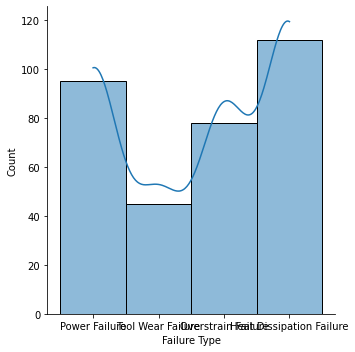

In [25]:
#seçilen tek değişkenin dağılımının basılması
plt.figure(figsize = (10, 8))
sns.displot(data=df[df['Target'] == 1], x="Failure Type", kde=True)

In [26]:
##veri setinin arıza türü bazında gruplanması ve değerlerin ortalaması
arizaturu = df.groupby('Failure Type').mean()
arizaturu

,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,temp_diff
Failure Type,,,,,,,
Heat Dissipation Failure,30.417857,38.649107,1337.964286,52.778571,107.339286,1.0,8.231250
No Failure,27.822519,37.844151,1540.354869,39.622389,106.669086,0.0,10.021632
Overstrain Failure,27.717949,37.901282,1354.243590,56.878205,208.217949,1.0,10.183333
Power Failure,27.925789,37.804737,1763.968421,48.514737,101.884211,1.0,9.878947
Random Failures,28.616667,38.605556,1489.444444,43.522222,119.888889,0.0,9.988889
Tool Wear Failure,28.138889,38.014444,1570.666667,37.226667,216.555556,1.0,9.875556


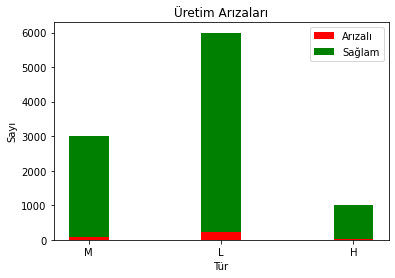

In [27]:
labels_Failed = ["M", "L", "H"]
#türlere göre arızaların ayrılması
M_Failed = sum(df.loc[df['Type']=='M'].Target)
L_Failed = sum(df.loc[df['Type']=='L'].Target)
H_Failed = sum(df.loc[df['Type']=='H'].Target)
Failed=[M_Failed, L_Failed, H_Failed]

#Kalite türlerine göre toplam ürün sayıları
M_Tot = len(df.loc[df['Type']=='M'].Target)
L_Tot = len(df.loc[df['Type']=='L'].Target)
H_Tot = len(df.loc[df['Type']=='H'].Target)

#türlere göre sorunsuz olanların ayrılması
M_NF = M_Tot-M_Failed
L_NF = L_Tot-L_Failed
H_NF = H_Tot-H_Failed

NFail = [M_NF, L_NF, H_NF]

fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_Failed, Failed, width, label='Arızalı',color='Red')
ax.bar(labels_Failed, NFail, width, bottom=Failed,label='Sağlam',color='green')
ax.set_xlabel('Tür')
ax.set_ylabel('Sayı')
ax.set_title('Üretim Arızaları')
ax.legend()


In [28]:
#hata yüzdelerinin basılması
print('Sağlam ürünler:',round((M_NF+L_NF+H_NF)*100/(M_Tot+L_Tot+H_Tot),1),'%')
print('Arızalı ürünler:',round((M_Failed+L_Failed+H_Failed)*100/(M_Tot+L_Tot+H_Tot),1),'%')

Sağlam ürünler: 96.7 %
Arızalı ürünler: 3.3 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points 

<AxesSubplot:xlabel='Process temperature [C]', ylabel='Air temperature [C]'>

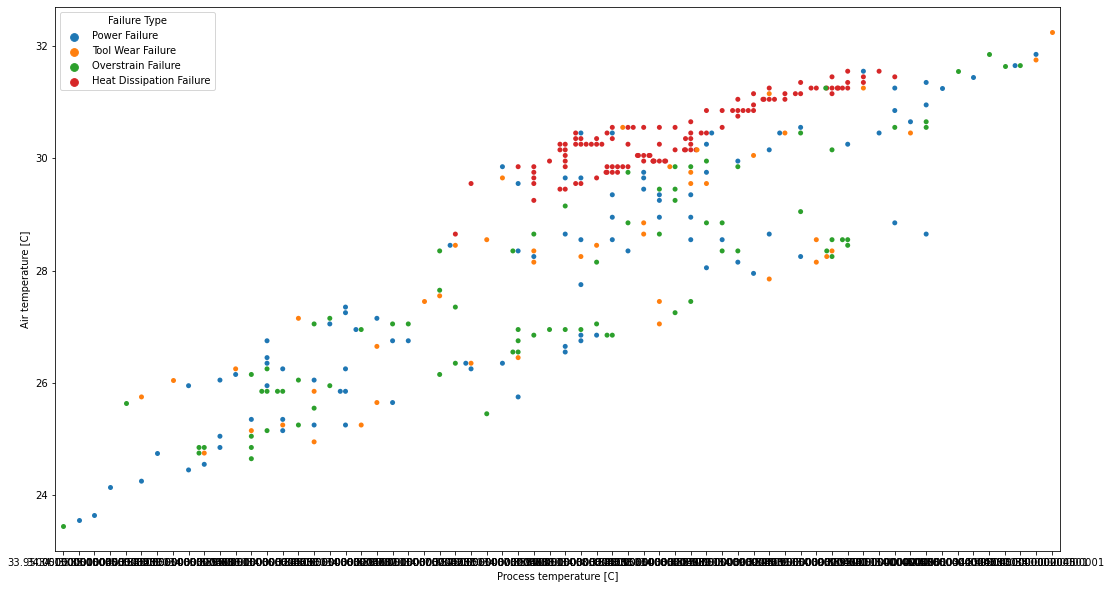

In [29]:
#Sıcaklık eksenlerine göre sürü grafiği
plt.figure(figsize=(18,10))
sns.swarmplot(data=df[df['Target'] == 1],x="Process temperature [C]",y='Air temperature [C]',hue="Failure Type")

In [30]:
#Sürü grafiği farklı kategorik değişkenlerin görselleştirilmesine yardımcı olur. 
#benzer şekilde scatter plot (serpilme grafiği) de 2 tür verinin incelendiği durumda kullanılabilir, 
#bu veri analizi için sürü grafiğine göre daha hızlı sonuç alınmıştır.

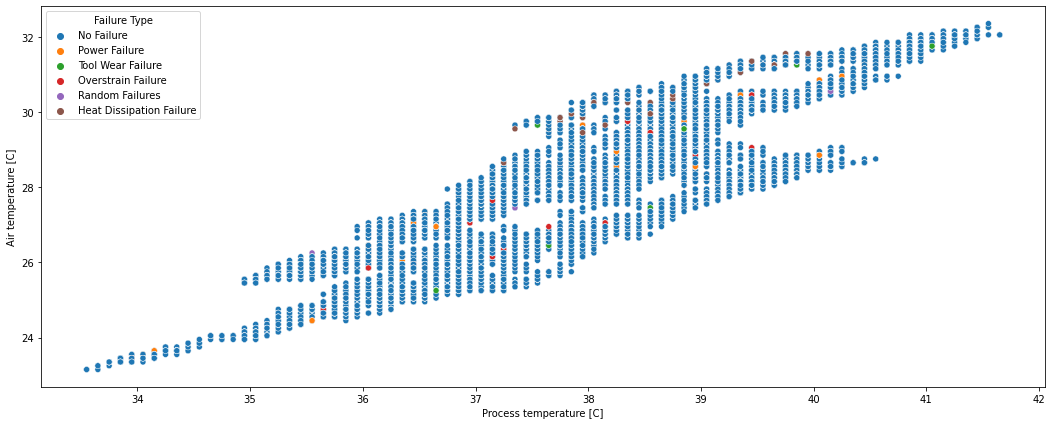

In [31]:
#farklı değişkenlere göre arızaların oluşmasının gözlemlenmesi (arıza olmayan durumlar hariç tutulmadan)
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Process temperature [C]", y="Air temperature [C]", hue="Failure Type");

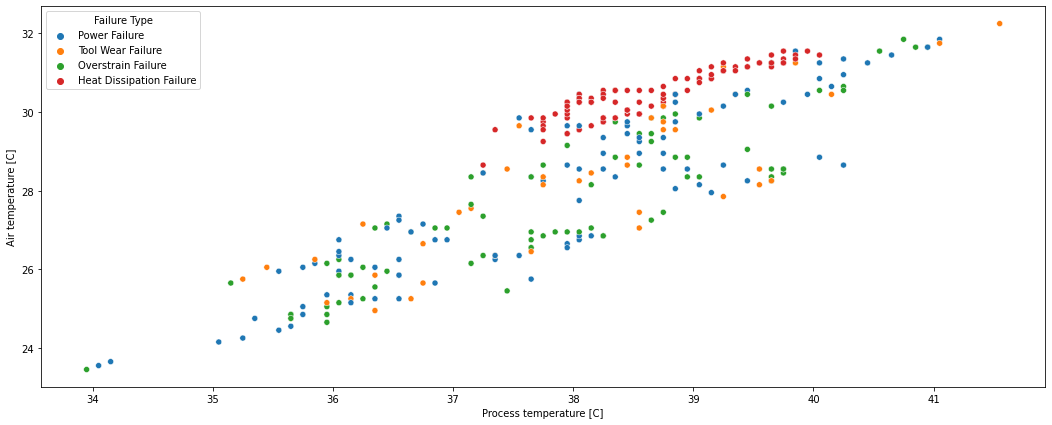

In [32]:
#farklı değişkenlere göre arızaların oluşmasının gözlemlenmesi (arızalı olduğu durumda yani df['Target'] == 1 iken)
plt.figure(figsize=(18,7))
sns.scatterplot(data=df[df['Target'] == 1], x="Process temperature [C]", y="Air temperature [C]", hue="Failure Type");

In [33]:
#bazı durumlarda verilerin belirli bir kısmının analiz edilmesi daha anlaşılır sonuçlar sunabilirken 
#bazılarında tüm verinin değerlendirilmesi daha açıklayıcı olabilir.

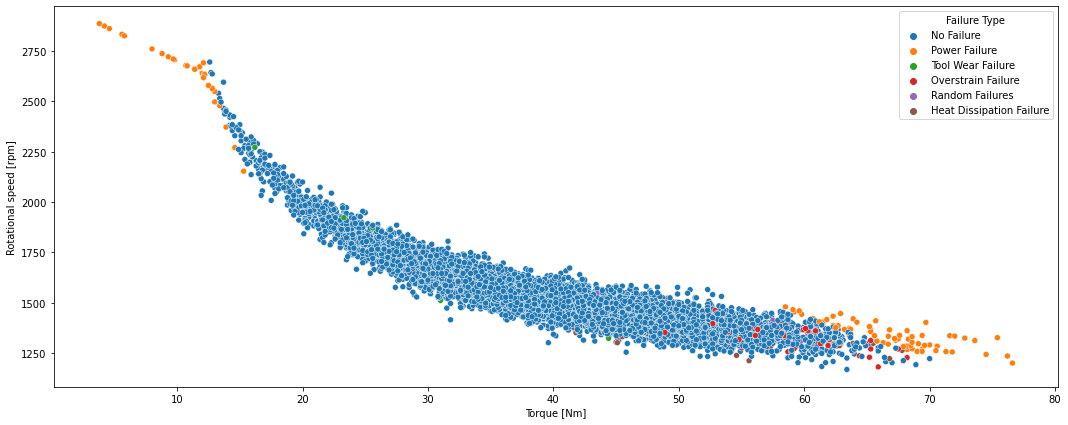

In [34]:
#farklı değişkenlere göre arızaların oluşmasının gözlemlenmesi (arıza olmayan durumlar hariç tutulmadan) -  Torque ve rotational speed için
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type");

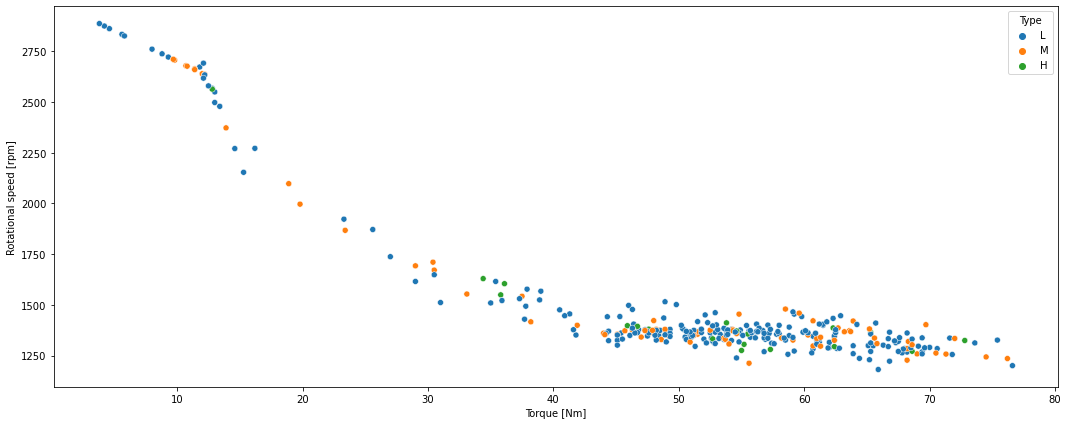

In [35]:
# Torque ve rotational speed değerlerine göre arıza olan durumda (Target = 1 iken) ürün türü dağılımı
plt.figure(figsize=(18,7))
sns.scatterplot(data=df[df['Target'] == 1], x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type");